# Simple Linear Regression

#### Importing needed packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

#### Downloading fuel dataset

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202

#### Reading the data in

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df["ENGINESIZE"].head()

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
Name: ENGINESIZE, dtype: float64

#### Exploring Data

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


#### Visualizing data

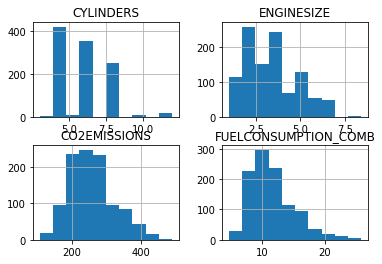

In [9]:
viz = cdf[["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB"]]
viz.hist()
plt.show()

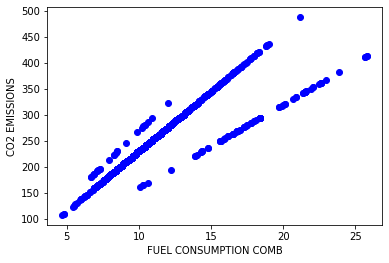

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUEL CONSUMPTION COMB')
plt.ylabel('CO2 EMISSIONS')
plt.show()

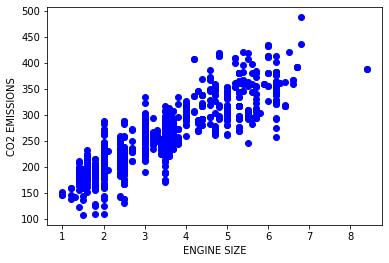

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

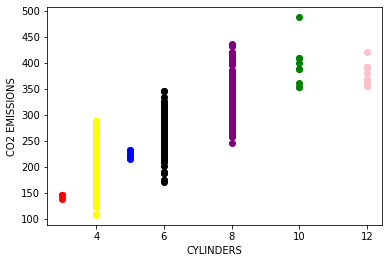

In [12]:
maximum = max(cdf.CYLINDERS)
colors = ['white', 'white', 'white', 'red', 'yellow', 'blue', 'black', 'white', 'purple', 'white', 'green', 'white', 'pink']
for i in range(maximum + 1):
    plt.scatter(cdf.CYLINDERS[cdf.CYLINDERS==i], cdf.CO2EMISSIONS[cdf.CYLINDERS==i], color=colors[i])

    
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')
plt.show()

# Scatter Warm-up
for practicing to see each data cylinders in different colors
## See Below Link
<a href='https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib'>Setting different color for each series in scatter plot on matplotlib</a>

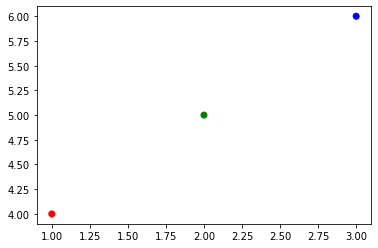

In [13]:
plt.scatter([1,2,3],[4,5,6],color=['red','green','blue'])

In [14]:
from random import randint

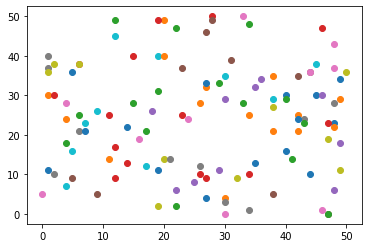

In [15]:
#Let's generate some random X, Y data X = [ [frst group],[second group] ...]
X = [ [randint(0,50) for i in range(0,5)] for i in range(0,24)]
Y = [ [randint(0,50) for i in range(0,5)] for i in range(0,24)]
labels = range(1,len(X)+1)

fig = plt.figure()
ax = fig.add_subplot(111)
for x,y,lab in zip(X,Y,labels):
        ax.scatter(x,y,label=lab)

# Split Data to train and test

In [16]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

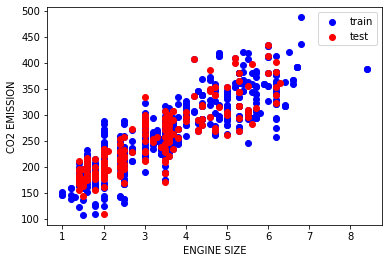

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red', label='test')
ax.set_xlabel('ENGINE SIZE')
ax.set_ylabel('CO2 EMISSION')
ax.legend(loc='upper right')
plt.show()

#### Modeling

In [33]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[38.70915194]]
Intercept:  [126.51839351]


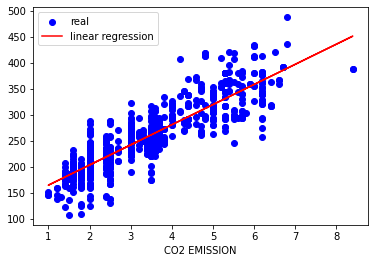

In [34]:
a = reg.coef_[0][0]
b = reg.intercept_[0]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue', label='real')
ax.plot(train_x, a * train_x  + b, '-r', label='linear regression')
ax.set_xlabel('ENGINESIZE')
ax.set_xlabel('CO2 EMISSION')
ax.legend()
plt.show()

#### Evaluation

In [35]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)
print("Mean Square Error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Mean Absolute Error: %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2: %.2f" % r2_score(test_y, test_y_))

Mean Square Error: 24.36
Mean Absolute Error: 993.54
R2: 0.76
